In [36]:
import ast 
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [38]:
df=my_dataset['train'].to_pandas()

In [39]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [40]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [41]:
df=df.explode('job_skills')

In [42]:
df_DA_US=df[(df['job_location']=='United States') & (df['job_title_short']=='Data Analyst')]

In [43]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1078,Data Analyst,"Data Analyst, Education Policy Studies",United States,via LinkedIn,Full-time,False,"Illinois, United States",2023-07-07 13:06:26,False,False,United States,None,NaN,NaN,American Enterprise Institute,html,"{'analyst_tools': ['tableau', 'power bi', 'out..."
1078,Data Analyst,"Data Analyst, Education Policy Studies",United States,via LinkedIn,Full-time,False,"Illinois, United States",2023-07-07 13:06:26,False,False,United States,None,NaN,NaN,American Enterprise Institute,css,"{'analyst_tools': ['tableau', 'power bi', 'out..."
1078,Data Analyst,"Data Analyst, Education Policy Studies",United States,via LinkedIn,Full-time,False,"Illinois, United States",2023-07-07 13:06:26,False,False,United States,None,NaN,NaN,American Enterprise Institute,javascript,"{'analyst_tools': ['tableau', 'power bi', 'out..."
1078,Data Analyst,"Data Analyst, Education Policy Studies",United States,via LinkedIn,Full-time,False,"Illinois, United States",2023-07-07 13:06:26,False,False,United States,None,NaN,NaN,American Enterprise Institute,r,"{'analyst_tools': ['tableau', 'power bi', 'out..."
1078,Data Analyst,"Data Analyst, Education Policy Studies",United States,via LinkedIn,Full-time,False,"Illinois, United States",2023-07-07 13:06:26,False,False,United States,None,NaN,NaN,American Enterprise Institute,python,"{'analyst_tools': ['tableau', 'power bi', 'out..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775732,Data Analyst,Data Analyst,United States,via LinkedIn,Full-time,False,Sudan,2023-12-18 02:14:13,False,False,Sudan,None,NaN,NaN,"Alzheimer North Carolina, Inc.",azure,"{'analyst_tools': ['excel', 'tableau', 'power ..."
775732,Data Analyst,Data Analyst,United States,via LinkedIn,Full-time,False,Sudan,2023-12-18 02:14:13,False,False,Sudan,None,NaN,NaN,"Alzheimer North Carolina, Inc.",excel,"{'analyst_tools': ['excel', 'tableau', 'power ..."
775732,Data Analyst,Data Analyst,United States,via LinkedIn,Full-time,False,Sudan,2023-12-18 02:14:13,False,False,Sudan,None,NaN,NaN,"Alzheimer North Carolina, Inc.",tableau,"{'analyst_tools': ['excel', 'tableau', 'power ..."
775732,Data Analyst,Data Analyst,United States,via LinkedIn,Full-time,False,Sudan,2023-12-18 02:14:13,False,False,Sudan,None,NaN,NaN,"Alzheimer North Carolina, Inc.",power bi,"{'analyst_tools': ['excel', 'tableau', 'power ..."


drop NAN values from the table

In [44]:
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [45]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,sql,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,excel,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,ms access,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
19941,Data Analyst,Session Lead (External Contractor) - Data Anal...,United States,via Ai-Jobs.net,Part-time,False,"Texas, United States",2023-07-25 13:04:46,True,False,United States,year,100500.0,NaN,"Udacity, Inc.",python,"{'libraries': ['numpy', 'pandas'], 'programmin..."
19941,Data Analyst,Session Lead (External Contractor) - Data Anal...,United States,via Ai-Jobs.net,Part-time,False,"Texas, United States",2023-07-25 13:04:46,True,False,United States,year,100500.0,NaN,"Udacity, Inc.",sql,"{'libraries': ['numpy', 'pandas'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754319,Data Analyst,Finance Master Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-12-21 20:53:32,False,False,Sudan,year,89204.0,NaN,Nestlé,excel,{'analyst_tools': ['excel']}
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,python,"{'programming': ['python', 'r']}"
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,r,"{'programming': ['python', 'r']}"
771915,Data Analyst,Provider Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-11-17 01:40:02,False,False,Sudan,year,69900.0,NaN,Health Care Service Corporation,word,"{'analyst_tools': ['word', 'excel']}"


<Axes: >

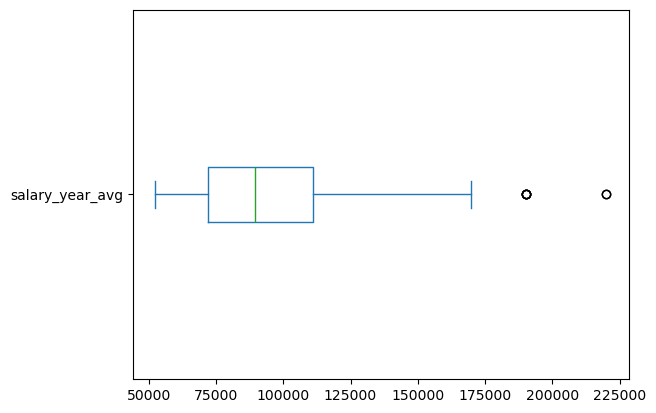

In [46]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

In [47]:
job_titles=['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')]
df_US=df_US.dropna(subset=['salary_year_avg'])

In [54]:
job_list=[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

In [55]:
job_list

[109       89000.0
 109       89000.0
 109       89000.0
 109       89000.0
 180       90250.0
            ...   
 784882    87500.0
 784882    87500.0
 784882    87500.0
 784882    87500.0
 784882    87500.0
 Name: salary_year_avg, Length: 17440, dtype: float64,
 100       228222.0
 100       228222.0
 100       228222.0
 100       228222.0
 116       114000.0
             ...   
 785648    221875.0
 785648    221875.0
 785692    157500.0
 785692    157500.0
 785692    157500.0
 Name: salary_year_avg, Length: 23735, dtype: float64,
 92        120000.0
 92        120000.0
 146       129500.0
 146       129500.0
 146       129500.0
             ...   
 785624    139216.0
 785624    139216.0
 785624    139216.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 21345, dtype: float64]

C:\Users\FAIZAN AKHTAR\AppData\Local\Temp\ipykernel_36788\4138416936.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


(0.0, 600000.0)

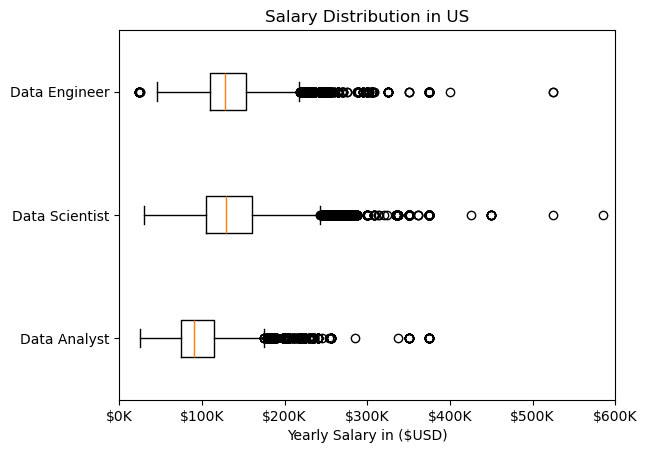

In [57]:
plt.boxplot(job_list, labels=job_titles, vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary in ($USD)')
plt.xlim(0, 600000)
